In [32]:
# Python3 샘플 코드 #


import requests

def get_request_url(YM='201201',NAT_CD='112',ED_CD='E'):
  url = 'http://openapi.tour.go.kr/openapi/service/EdrcntTourismStatsService/getEdrcntTourismStatsList'
  service_key = '인증받은서비스키( 인코더 안되면 디코더로)'
  params ={'serviceKey' : service_key, 'YM' : YM, 'NAT_CD' : NAT_CD, 'ED_CD' : ED_CD }

  return requests.get(url, params=params)

In [40]:
!pip install xmltodict
import xmltodict
import json
import pandas as pd
def getData(yy = '2012'):
  result = []
  for i in range(1,13):
    try:
      ym = yy + str(i).zfill(2)
      response = get_request_url(ym)
      # xml to dic
      dict_data = xmltodict.parse(response.content,encoding='utf-8')

      # dic to json
      json_str = json.dumps(dict_data,indent=4)  # 문자열형태
      json_data = json.loads(json_str) # json 타입

      # response header resultMsg OK

      if json_data["response"]["header"]["resultMsg"] == "OK":
          data = json_data["response"]["body"]["items"]["item"]
          result.append( [ data["ed"], data["edCd"], data["natCd"], data["natKorNm"],data["num"], data["rnum"], data["ym"] ]  )
    except:
      pass

  return pd.DataFrame(result,columns=['a','b','c','d','e','f','g'])

In [42]:
df = pd.concat([getData(str(i)) for i in range(2012,2025)], axis=0)
df

a  b    c     d       e  f       g
0   방한외래관광객  E  112  중  국  167022  1  201201
1   방한외래관광객  E  112  중  국  173790  1  201202
2   방한외래관광객  E  112  중  국  183691  1  201203
3   방한외래관광객  E  112  중  국  222114  1  201204
4   방한외래관광객  E  112  중  국  210439  1  201205
..      ... ..  ...   ...     ... ..     ...
1   방한외래관광객  E  112  중  국  343719  1  202402
2   방한외래관광객  E  112  중  국  391347  1  202403
3   방한외래관광객  E  112  중  국  411331  1  202404
4   방한외래관광객  E  112  중  국  395222  1  202405
5   방한외래관광객  E  112  중  국  397325  1  202406

[150 rows x 7 columns]

In [43]:
df.reset_index(drop=True,inplace=True)
df

a  b    c     d       e  f       g
0    방한외래관광객  E  112  중  국  167022  1  201201
1    방한외래관광객  E  112  중  국  173790  1  201202
2    방한외래관광객  E  112  중  국  183691  1  201203
3    방한외래관광객  E  112  중  국  222114  1  201204
4    방한외래관광객  E  112  중  국  210439  1  201205
..       ... ..  ...   ...     ... ..     ...
145  방한외래관광객  E  112  중  국  343719  1  202402
146  방한외래관광객  E  112  중  국  391347  1  202403
147  방한외래관광객  E  112  중  국  411331  1  202404
148  방한외래관광객  E  112  중  국  395222  1  202405
149  방한외래관광객  E  112  중  국  397325  1  202406

[150 rows x 7 columns]

No charts were generated by quickchart


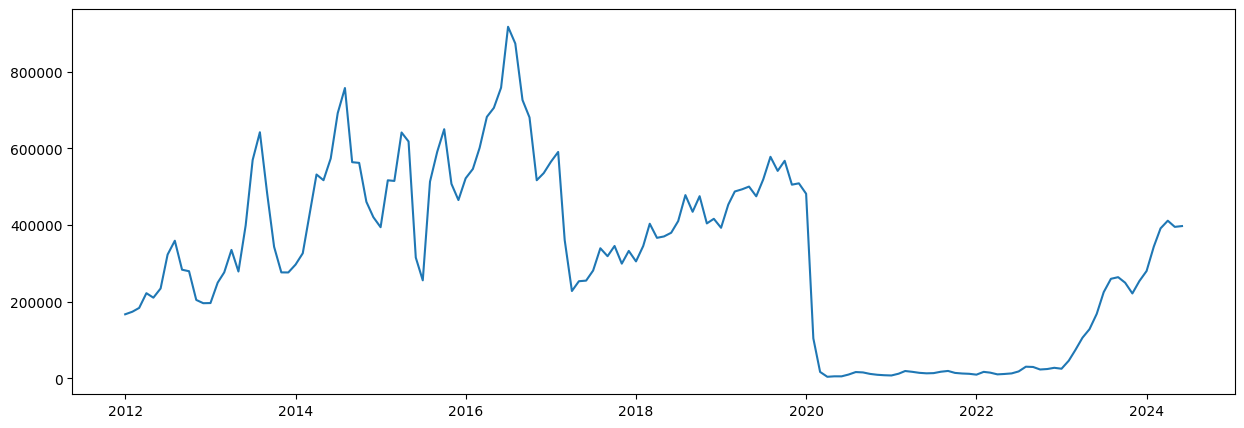

In [51]:
import matplotlib.pyplot as plt
# 년도를 datetime 형식으로 변환
df['g'] = pd.to_datetime(df['g'],format='%Y%m')
df['e'] = pd.to_numeric(df['e'])
plt.figure(figsize=(15,5))
plt.plot(df['g'],df['e'])
plt.show()

In [48]:
df['e']

0      167022
1      173790
2      183691
3      222114
4      210439
        ...  
145    343719
146    391347
147    411331
148    395222
149    397325
Name: e, Length: 150, dtype: object

In [53]:
# 이중 for문으로 개발하기
# 2012  2024
# 201201 ~ 202406
for y in range(2012,2025):
  for m in range(1,13):
    print(str(y)+str(m).zfill(2))

!pip install xmltodict
import xmltodict
import json
import pandas as pd
def getDataAll(start=2012, end=2024):
  result = []
  for y in range(start,end+1):
    for m in range(1,13):
      try:
        ym = str(y)+str(m).zfill(2)
        response = get_request_url(ym)
        # xml to dic
        dict_data = xmltodict.parse(response.content,encoding='utf-8')

        # dic to json
        json_str = json.dumps(dict_data,indent=4)  # 문자열형태
        json_data = json.loads(json_str) # json 타입

        # response header resultMsg OK

        if json_data["response"]["header"]["resultMsg"] == "OK":
            data = json_data["response"]["body"]["items"]["item"]
            result.append( [ data["ed"], data["edCd"], data["natCd"], data["natKorNm"],data["num"], data["rnum"], data["ym"] ]  )
      except:
        pass

  return pd.DataFrame(result,columns=['a','b','c','d','e','f','g'])

201201
201202
201203
201204
201205
201206
201207
201208
201209
201210
201211
201212
201301
201302
201303
201304
201305
201306
201307
201308
201309
201310
201311
201312
201401
201402
201403
201404
201405
201406
201407
201408
201409
201410
201411
201412
201501
201502
201503
201504
201505
201506
201507
201508
201509
201510
201511
201512
201601
201602
201603
201604
201605
201606
201607
201608
201609
201610
201611
201612
201701
201702
201703
201704
201705
201706
201707
201708
201709
201710
201711
201712
201801
201802
201803
201804
201805
201806
201807
201808
201809
201810
201811
201812
201901
201902
201903
201904
201905
201906
201907
201908
201909
201910
201911
201912
202001
202002
202003
202004
202005
202006
202007
202008
202009
202010
202011
202012
202101
202102
202103
202104
202105
202106
202107
202108
202109
202110
202111
202112
202201
202202
202203
202204
202205
202206
202207
202208
202209
202210
202211
202212
202301
202302
202303
202304
202305
202306
202307
202308
202309
202310
202311

네이버 API

In [60]:
# 네이버 검색 API 예제 - 블로그 검색
import os
import sys
import urllib.request
client_id = "클라이언트아이디"
client_secret = "시크릿아이디"
encText = urllib.parse.quote("올림픽")
url = "https://openapi.naver.com/v1/search/news?query=" + encText # JSON 결과
# url = "https://openapi.naver.com/v1/search/blog.xml?query=" + encText # XML 결과
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
response = urllib.request.urlopen(request)
rescode = response.getcode()
if(rescode==200):
    response_body = response.read()
    print(response_body.decode('utf-8'))
else:
    print("Error Code:" + rescode)

# title    originallink link description pubDate  컬럼명 데이터프레임으로 정리
# 1. dic형태의 문자열을 json객체로 만들어서
# 2. 리스트로 표현
# 3. 2번을 리스트로 다시 저장 즉 이중리스트
# 4. 데이터프레임함수를 이용해서 생성

{
	"lastBuildDate":"Tue, 30 Jul 2024 20:55:13 +0900",
	"total":4169453,
	"start":1,
	"display":10,
	"items":[
		{
			"title":"[포토]조성재, 예선 전체 1위의 여유",
			"originallink":"https:\/\/sports.chosun.com\/sports-news\/2024-07-30\/202407300100233130033367",
			"link":"https:\/\/m.sports.naver.com\/general\/article\/076\/0004175128",
			"description":"수영 대표팀의 조성재가 30일(한국 시간) 프랑스 파리 라 데팡스 아레나에서 열린 2024 파리<b>올림픽<\/b> 수영 평영 200m 예선에서 역영을 펼친 뒤 자신을 찍는 카메라를 향해 포즈를 취하고 있다. 조성재는 전체 1위로... ",
			"pubDate":"Tue, 30 Jul 2024 20:54:00 +0900"
		},
		{
			"title":"[포토] 전체 7위로 결선에 진출하는 남자 계영 대표팀",
			"originallink":"https:\/\/sports.chosun.com\/sports-news\/2024-07-30\/202407300100233140033368",
			"link":"https:\/\/m.sports.naver.com\/general\/article\/076\/0004175129",
			"description":"수영 남자 계영 대표팀이 30일(한국 시간) 프랑스 파리 라 데팡스 아레나에서 열린 2024 파리<b>올림픽<\/b> 수영 계영 200mx4m 예선에서 마지막 영자로 경기를 마친 김우민을 맞이하고 있다. 대표팀은 전체 7위로 결선에... ",
			"pubDate":"Tue, 30 Jul 2024 20:54:00 +0900"
		},
		{
			"title":"[포토] 조성재, 평영 200m 예선

In [67]:
# response_body.decode('utf-8')  --> json
import json
json_data = json.loads(response_body.decode('utf-8'))
result = []
for dic_data in json_data['items']:
  result.append([dic_data['title'],dic_data['originallink'],dic_data['link'],dic_data['description'],dic_data['pubDate']])
df = pd.DataFrame(result, columns=['title','originallink','link','description','pubDate'])
df

title  \
0                              [포토]조성재, 예선 전체 1위의 여유   
1                     [포토] 전체 7위로 결선에 진출하는 남자 계영 대표팀   
2                   [포토] 조성재, 평영 200m 예선 전체 1위로 준결선행   
3                                  프랑스와 8강, 환호하는 이혜인   
4  여자 핸드볼, 노르웨이에 패했지만…&quot;어려운 경기 잘 싸웠다&quot; [2...   
5               남자 계영 800ｍ…단체전 사상 첫 결승[파리<b>올림픽</b>]   
6                            폴리텍대 진주캠퍼스 2명 용접기능대회 동상   
7     ‘김우민 미친 스퍼트’ 男자유형 800m 계영, 황선우 없이도 결승 진출…단체...   
8  [파리<b>올림픽</b>] 조성재, 남자 평영 200ｍ 예선 전체 1위 준결승행.....   
9  ['24 파리 <b>올림픽</b>] 조성재, 남자 평영 200ｍ 준결승행…예선 전체 1위   

                                        originallink  \
0  https://sports.chosun.com/sports-news/2024-07-...   
1  https://sports.chosun.com/sports-news/2024-07-...   
2  https://sports.chosun.com/sports-news/2024-07-...   
3  https://www.yna.co.kr/view/PYH2024073024540001...   
4     https://www.hankyung.com/article/2024073002717   
5  https://view.asiae.co.kr/article/2024073020532...   
6  http://www.gnnews.co.kr/news/articleView.html?...   
7  https://www.sportsseoul.com/news/read/1450187?...   
8  https://www.slist.kr/news/articleView.html?idx...   
9  https://www.ebn.co.kr/news/view/1631693/?sc=Naver   

                                                link  \
0  https://m.sports.naver.com/general/article/076...   
1  https://m.sports.naver.com/general/article/076...   
2  https://m.sports.naver.com/general/article/076...   
3  https://n.news.naver.com/mnews/article/001/001...   
4  https://n.news.naver.com/mnews/article/015/000...   
5  https://n.news.naver.com/mnews/article/277/000...   
6  http://www.gnnews.co.kr/news/articleView.html?...   
7  https://m.sports.naver.com/paris2024/article/4...   
8  https://www.slist.kr/news/articleView.html?idx...   
9  https://www.ebn.co.kr/news/view/1631693/?sc=Naver   

                                         description  \
0  수영 대표팀의 조성재가 30일(한국 시간) 프랑스 파리 라 데팡스 아레나에서 열린 ...   
1  수영 남자 계영 대표팀이 30일(한국 시간) 프랑스 파리 라 데팡스 아레나에서 열린...   
2  수영 대표팀의 조성재가 30일(한국 시간) 프랑스 파리 라 데팡스 아레나에서 열린 ...   
3  30일(현지시간) 프랑스 파리 그랑 팔레에서 열린 2024 파리<b>올림픽</b> ...   
4  한국은 30일 프랑스 파리의 사우스 파리 아레나에서 열린 2024 파리 <b>올림픽...   
5  남자 계영 800ｍ 대표팀이 한국 수영 경영 단체전 사상 처음으로 <b>올림픽</b...   
6  국제기능<b>올림픽</b>대회 한국위원회가 후원하에 지난 14일부터 20일까지 한국...   
7  30일(현지시간) 프랑스 파리 라데팡스 아레나에서 열린 2024 파리 <b>올림픽<...   
8  조성재(23·대전광역시청)가 한국 수영 최초로 <b>올림픽</b> 평영 종목 준결승...   
9  남자 수영 국가대표 조성재(대전광역시청)가 한국 수영 최초로 <b>올림픽</b> 평...   

                           pubDate  
0  Tue, 30 Jul 2024 20:54:00 +0900  
1  Tue, 30 Jul 2024 20:54:00 +0900  
2  Tue, 30 Jul 2024 20:54:00 +0900  
3  Tue, 30 Jul 2024 20:53:00 +0900  
4  Tue, 30 Jul 2024 20:53:00 +0900  
5  Tue, 30 Jul 2024 20:53:00 +0900  
6  Tue, 30 Jul 2024 20:52:00 +0900  
7  Tue, 30 Jul 2024 20:52:00 +0900  
8  Tue, 30 Jul 2024 20:52:00 +0900  
9  Tue, 30 Jul 2024 20:52:00 +0900